In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


In [10]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


In [11]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar  9 04:23 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


In [12]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [16]:
DF.drop('Time', axis=1, inplace=True)
DF.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
X = DF.iloc[:, :-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((284807, 29), (284807,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [22]:
print(f'Train Data: \n {(y_train.value_counts() / y_train.shape[0]) * 100}')
print(f'Test Data: \n {(y_test.value_counts() / y_test.shape[0]) * 100}')

Train Data: 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test Data: 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


## EDA

In [35]:
import scipy.stats as stats
pearsonr_list = []
for column in DF.columns:
  if column == 'Class' : continue
  pearsonr_list.append([column, stats.pearsonr(DF[column], DF["Class"])[0]])
  print(f'{column} - Class 상관계수 : {stats.pearsonr(DF[column], DF["Class"])[0]}')

V1 - Class 상관계수 : -0.10134729859508598
V2 - Class 상관계수 : 0.09128865034462008
V3 - Class 상관계수 : -0.1929608270674153
V4 - Class 상관계수 : 0.133447486239006
V5 - Class 상관계수 : -0.09497429899144921
V6 - Class 상관계수 : -0.04364316069996437
V7 - Class 상관계수 : -0.18725659151429974
V8 - Class 상관계수 : 0.019875123914794623
V9 - Class 상관계수 : -0.09773268607407976
V10 - Class 상관계수 : -0.21688294364102956
V11 - Class 상관계수 : 0.15487564474394916
V12 - Class 상관계수 : -0.2605929248772196
V13 - Class 상관계수 : -0.004569778799461309
V14 - Class 상관계수 : -0.30254369580440715
V15 - Class 상관계수 : -0.004223402267856705
V16 - Class 상관계수 : -0.1965389403040205
V17 - Class 상관계수 : -0.32648106724371784
V18 - Class 상관계수 : -0.11148525388904237
V19 - Class 상관계수 : 0.034783013036515126
V20 - Class 상관계수 : 0.020090324196975567
V21 - Class 상관계수 : 0.04041338061057595
V22 - Class 상관계수 : 0.0008053175052984462
V23 - Class 상관계수 : -0.0026851557402507364
V24 - Class 상관계수 : -0.007220906715952784
V25 - Class 상관계수 : 0.003307705597299681
V26 - Class 

In [36]:
pearsonr_list.sort(key=lambda x: -x[1])
for i in range(len(pearsonr_list)):
  print(f'{pearsonr_list[i][0]} - Class 상관계수 : {pearsonr_list[i][1]}')

V11 - Class 상관계수 : 0.15487564474394916
V4 - Class 상관계수 : 0.133447486239006
V2 - Class 상관계수 : 0.09128865034462008
V21 - Class 상관계수 : 0.04041338061057595
V19 - Class 상관계수 : 0.034783013036515126
V20 - Class 상관계수 : 0.020090324196975567
V8 - Class 상관계수 : 0.019875123914794623
V27 - Class 상관계수 : 0.01757972818951344
V28 - Class 상관계수 : 0.009536040916236268
Amount - Class 상관계수 : 0.005631753006768727
V26 - Class 상관계수 : 0.0044553975012833836
V25 - Class 상관계수 : 0.003307705597299681
V22 - Class 상관계수 : 0.0008053175052984462
V23 - Class 상관계수 : -0.0026851557402507364
V15 - Class 상관계수 : -0.004223402267856705
V13 - Class 상관계수 : -0.004569778799461309
V24 - Class 상관계수 : -0.007220906715952784
V6 - Class 상관계수 : -0.04364316069996437
V5 - Class 상관계수 : -0.09497429899144921
V9 - Class 상관계수 : -0.09773268607407976
V1 - Class 상관계수 : -0.10134729859508598
V18 - Class 상관계수 : -0.11148525388904237
V7 - Class 상관계수 : -0.18725659151429974
V3 - Class 상관계수 : -0.1929608270674153
V16 - Class 상관계수 : -0.1965389403040205
V10 - Cl

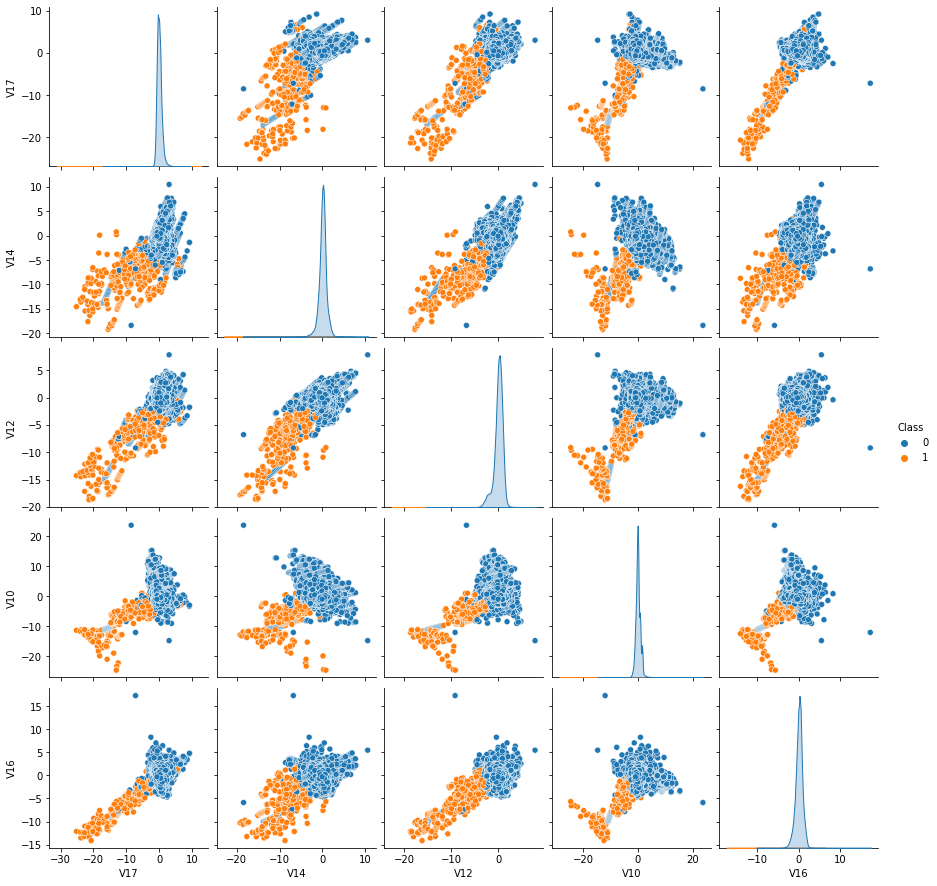

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue='Class', data=DF[['V17', 'V14', 'V12', 'V10', 'V16', 'Class']])
plt.show()

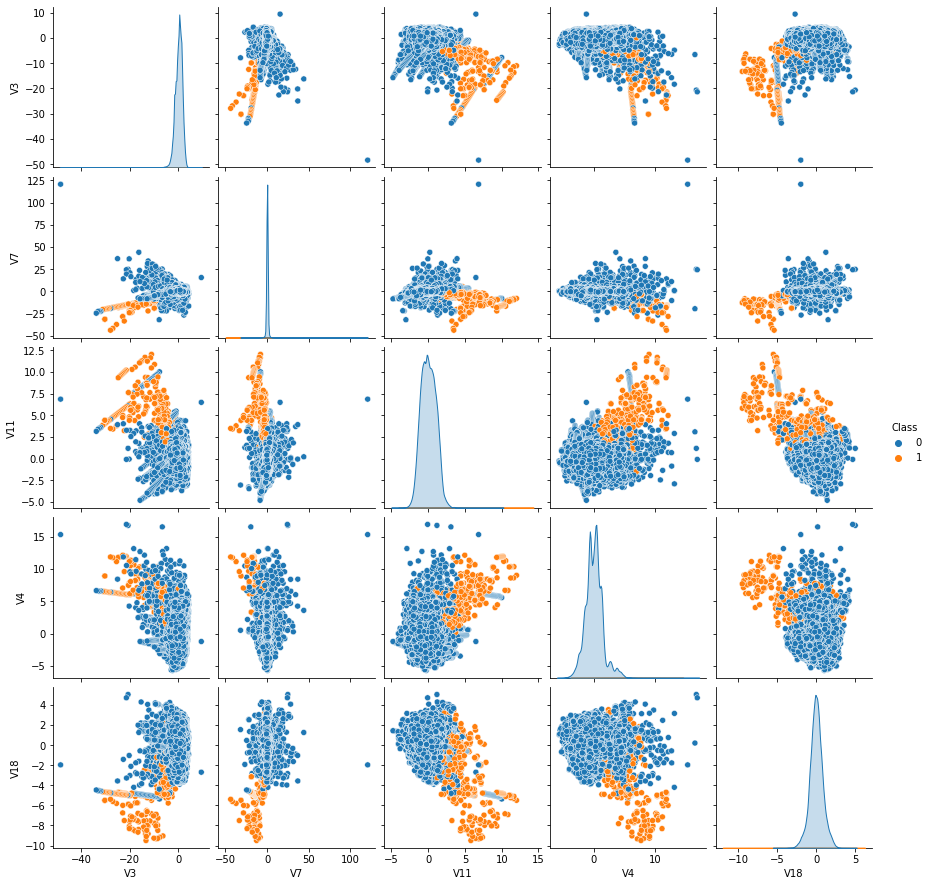

In [114]:
sns.pairplot(hue='Class', data=DF[['V3', 'V7', 'V11', 'V4', 'V18', 'Class']])
plt.show()

## All Features

In [40]:
X = DF.iloc[:, :-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((284807, 29), (284807,))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [115]:
results = []

### Logistic Regression

In [42]:
%%time

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.3,
                        penalty='l2',
                        multi_class='multinomial',
                        n_jobs=-1)

LR.fit(X_train, y_train)

CPU times: user 143 ms, sys: 99.6 ms, total: 242 ms
Wall time: 12.2 s


In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

accuracy_score_LR = accuracy_score(y_test, LR.predict(X_test))
recall_score_LR = recall_score(y_test, LR.predict(X_test), pos_label=1)

print(accuracy_score_LR)
print(recall_score_LR)
print(confusion_matrix(y_test, LR.predict(X_test)))

results.append(['Logistic Regression', recall_score_LR, accuracy_score_LR])

0.9992860737567735
0.7162162162162162
[[85276    19]
 [   42   106]]


### Decision Tree Classifier

In [48]:
%%time

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            random_state=2045)

DT.fit(X_train, y_train)

CPU times: user 8.44 s, sys: 12.7 ms, total: 8.45 s
Wall time: 8.5 s


In [117]:
accuracy_score_DT = accuracy_score(y_test, DT.predict(X_test))
recall_score_DT = recall_score(y_test, DT.predict(X_test), pos_label=1)

print(accuracy_score_DT)
print(recall_score_DT)
print(confusion_matrix(y_test, DT.predict(X_test)))

results.append(['Decision Tree', recall_score_DT, accuracy_score_DT])

0.9993914071369217
0.7905405405405406
[[85274    21]
 [   31   117]]


In [50]:
DT.feature_importances_

array([0.        , 0.        , 0.0030644 , 0.01968807, 0.        ,
       0.        , 0.        , 0.00876876, 0.        , 0.10717282,
       0.        , 0.00440775, 0.00546068, 0.69227477, 0.        ,
       0.01000022, 0.10767429, 0.        , 0.00182864, 0.        ,
       0.00733465, 0.        , 0.        , 0.        , 0.        ,
       0.01091639, 0.01020742, 0.        , 0.01120114])

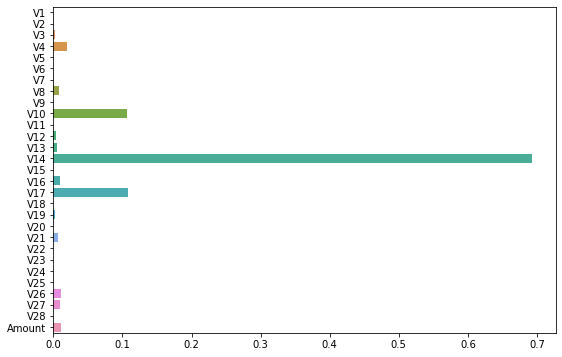

In [53]:
plt.figure(figsize=(9, 6))
sns.barplot(DT.feature_importances_, X.columns)
plt.show()

### Random Forest Classifier

In [54]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy',
                            n_estimators=100,
                            max_features=10,
                            max_depth=5,
                            random_state=2045,
                            n_jobs=-1)

RF.fit(X_train, y_train)

CPU times: user 4min 41s, sys: 36.5 ms, total: 4min 41s
Wall time: 2min 23s


In [119]:
accuracy_score_RF = accuracy_score(y_test, RF.predict(X_test))
recall_score_RF = recall_score(y_test, RF.predict(X_test), pos_label=1)

print(accuracy_score_RF)
print(recall_score_RF)
print(confusion_matrix(y_test, RF.predict(X_test)))

results.append(['Random Forest', recall_score_RF, accuracy_score_RF])

0.9995318516437859
0.8175675675675675
[[85282    13]
 [   27   121]]


In [56]:
RF.feature_importances_

array([0.00100092, 0.0037454 , 0.01881016, 0.02316668, 0.00267921,
       0.00281743, 0.02103495, 0.00361074, 0.01190854, 0.13951723,
       0.05818982, 0.08257603, 0.00166073, 0.29862299, 0.00118821,
       0.02609492, 0.26371918, 0.00363497, 0.00143032, 0.00313551,
       0.00466837, 0.00155409, 0.00163834, 0.00231371, 0.001295  ,
       0.0084167 , 0.00305807, 0.00458902, 0.00392274])

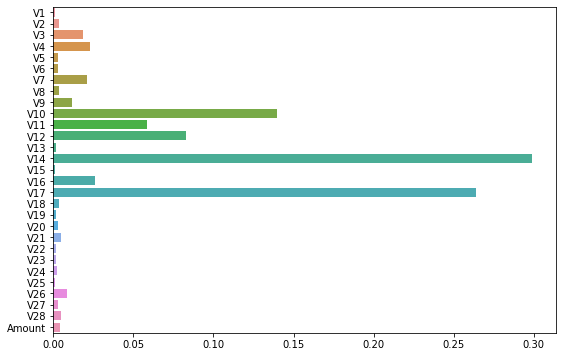

In [57]:
plt.figure(figsize=(9, 6))
sns.barplot(RF.feature_importances_, X.columns)
plt.show()

### Gradient Boosting Machine Classifier

In [59]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(loss='deviance',
                                 n_estimators=100,
                                 learning_rate=0.01,
                                 max_features=10,
                                 max_depth=5)
GBC.fit(X_train, y_train)

CPU times: user 3min 21s, sys: 61.9 ms, total: 3min 21s
Wall time: 3min 21s


In [120]:
accuracy_score_GBC = accuracy_score(y_test, GBC.predict(X_test))
recall_score_GBC = recall_score(y_test, GBC.predict(X_test), pos_label=1)

print(accuracy_score_GBC)
print(recall_score_GBC)
print(confusion_matrix(y_test, GBC.predict(X_test)))

results.append(['Gradient Boosting Machine', recall_score_GBC, accuracy_score_GBC])

0.9992275552122467
0.6351351351351351
[[85283    12]
 [   54    94]]


In [61]:
GBC.feature_importances_

array([0.00406302, 0.00700584, 0.00925139, 0.02112731, 0.00425378,
       0.00653346, 0.03244617, 0.00583394, 0.02422086, 0.13645411,
       0.02520049, 0.20481093, 0.00271449, 0.14983273, 0.00369882,
       0.03308886, 0.24676728, 0.01656105, 0.00239855, 0.00348291,
       0.00746101, 0.00240017, 0.00162975, 0.00678972, 0.00307371,
       0.01953891, 0.00943559, 0.00643619, 0.00348896])

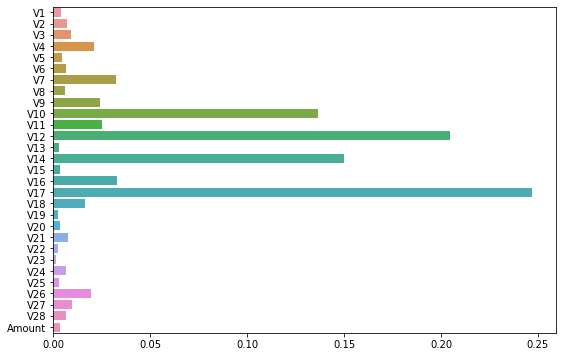

In [62]:
plt.figure(figsize=(9, 6))
sns.barplot(GBC.feature_importances_, X.columns)
plt.show()

### Adaptive Boosting Classifier

In [63]:
%%time

from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.01,
                         random_state=2045)
ABC.fit(X_train, y_train)

CPU times: user 2min 8s, sys: 101 ms, total: 2min 8s
Wall time: 2min 8s


In [121]:
accuracy_score_ABC = accuracy_score(y_test, ABC.predict(X_test))
recall_score_ABC = recall_score(y_test, ABC.predict(X_test), pos_label=1)

print(accuracy_score_ABC)
print(recall_score_ABC)
print(confusion_matrix(y_test, ABC.predict(X_test)))

results.append(['Adaptive Boosting', recall_score_ABC, accuracy_score_ABC])

0.9991807403766253
0.6283783783783784
[[85280    15]
 [   55    93]]


In [65]:
ABC.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  ,
       0.03, 0.  , 0.55, 0.  , 0.  , 0.23, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

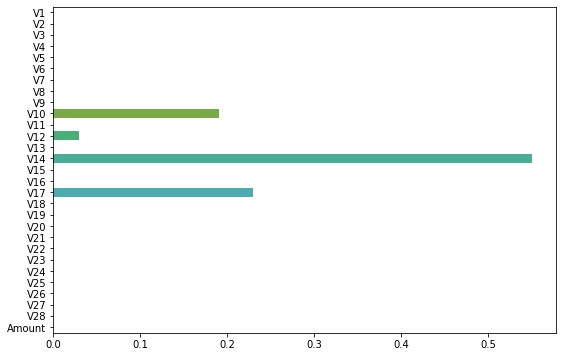

In [66]:
plt.figure(figsize=(9, 6))
sns.barplot(ABC.feature_importances_, X.columns)
plt.show()

### eXtra Gradient Boost Classifier

In [67]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(booster='gbtree',
                    n_estimators=100,
                    learning_rate=0.01,
                    reg_lambda=0.05,
                    n_jobs=-1)

XGB.fit(X_train, y_train)

CPU times: user 1min 14s, sys: 83.6 ms, total: 1min 14s
Wall time: 38.3 s


In [122]:
accuracy_score_XGB = accuracy_score(y_test, XGB.predict(X_test))
recall_score_XGB = recall_score(y_test, XGB.predict(X_test), pos_label=1)

print(accuracy_score_XGB)
print(recall_score_XGB)
print(confusion_matrix(y_test, XGB.predict(X_test)))

results.append(['eXtra Gradient Boost', recall_score_XGB, accuracy_score_XGB])

0.9993679997191109
0.8108108108108109
[[85269    26]
 [   28   120]]


In [69]:
XGB.feature_importances_

array([0.        , 0.00264938, 0.01822007, 0.03162226, 0.        ,
       0.        , 0.03313787, 0.00941536, 0.        , 0.06483984,
       0.00713207, 0.06466207, 0.        , 0.04939398, 0.        ,
       0.        , 0.6283208 , 0.        , 0.        , 0.        ,
       0.01717604, 0.00956864, 0.        , 0.        , 0.        ,
       0.02795431, 0.01652666, 0.01938063, 0.        ], dtype=float32)

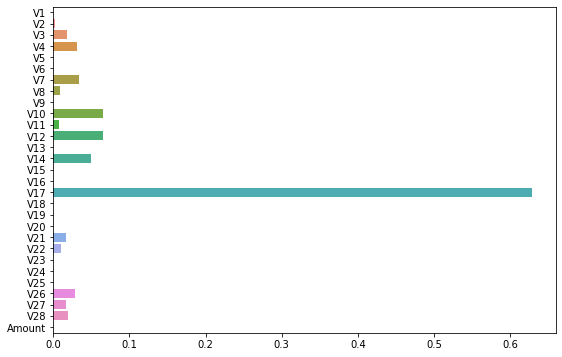

In [70]:
plt.figure(figsize=(9, 6))
sns.barplot(XGB.feature_importances_, X.columns)
plt.show()

### LightGBM Classifier

In [71]:
%%time

from lightgbm import LGBMClassifier

LGB = LGBMClassifier(n_estimators=500,
                     max_depth=3,
                     learning_rate=0.5,
                     reg_lambda=0.2,
                     n_jobs=-1)

LGB.fit(X_train, y_train)

CPU times: user 23.2 s, sys: 83.3 ms, total: 23.2 s
Wall time: 12 s


In [123]:
accuracy_score_LGB = accuracy_score(y_test, LGB.predict(X_test))
recall_score_LGB = recall_score(y_test, LGB.predict(X_test), pos_label=1)

print(accuracy_score_LGB)
print(recall_score_LGB)
print(confusion_matrix(y_test, LGB.predict(X_test)))

results.append(['LightGBM', recall_score_LGB, accuracy_score_LGB])

0.9992158515033414
0.7364864864864865
[[85267    28]
 [   39   109]]


In [73]:
LGB.feature_importances_

array([130,  82,  92, 147,  95, 119, 106, 142,  90, 136, 104, 112, 155,
       156, 122, 100,  93, 153,  78,  94, 111, 140,  93, 140, 110, 101,
       138, 105, 106])

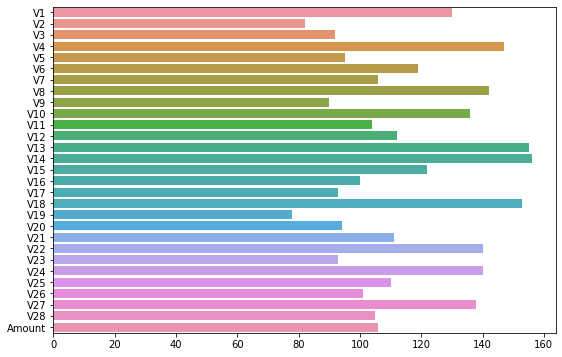

In [74]:
plt.figure(figsize=(9, 6))
sns.barplot(LGB.feature_importances_, X.columns)
plt.show()

### K-Nearest Neighbors Classifier

In [75]:
%%time

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=10,
                           n_jobs=-1)
KNN.fit(X_train, y_train)

CPU times: user 1.72 s, sys: 9.73 ms, total: 1.73 s
Wall time: 1.73 s


In [124]:
accuracy_score_KNN = accuracy_score(y_test, KNN.predict(X_test))
recall_score_KNN = recall_score(y_test, KNN.predict(X_test), pos_label=1)

print(accuracy_score_KNN)
print(recall_score_KNN)
print(confusion_matrix(y_test, KNN.predict(X_test)))
results.append(['KNN', recall_score_KNN, accuracy_score_KNN])

0.9991456292499094
0.6013513513513513
[[85281    14]
 [   59    89]]


### Result

In [125]:
results.sort(key=lambda x: -x[1])
print(f'\t\t --Recall Score--\n')
for i in range(len(results)):
  print(f'{results[i][0]:>25} : {results[i][1]:.5f}')

results.sort(key=lambda x: -x[2])
print(f'\t\t --Accuracy Score--\n')
for i in range(len(results)):
  print(f'{results[i][0]:>25} : {results[i][2]:.5f}')

		 --Recall Score--

            Random Forest : 0.81757
     eXtra Gradient Boost : 0.81081
            Decision Tree : 0.79054
                 LightGBM : 0.73649
      Logistic Regression : 0.71622
Gradient Boosting Machine : 0.63514
        Adaptive Boosting : 0.62838
                      KNN : 0.60135
		 --Accuracy Score--

            Random Forest : 0.99953
            Decision Tree : 0.99939
     eXtra Gradient Boost : 0.99937
      Logistic Regression : 0.99929
Gradient Boosting Machine : 0.99923
                 LightGBM : 0.99922
        Adaptive Boosting : 0.99918
                      KNN : 0.99915


## X: V17, 14, 12, 10, 16, 3, 7, 11, 4, 18

상관계수 높게 나왔던 10개

In [126]:
X = DF[['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']]
y = DF.iloc[:,-1]

X.shape, y.shape

((284807, 10), (284807,))

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 10), (199364,), (85443, 10), (85443,))

In [128]:
results_2 = []

### Random Forest Classifier

In [131]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy',
                            n_estimators=100,
                            max_features=7,
                            max_depth=7,
                            random_state=2045,
                            n_jobs=-1)

RF.fit(X_train, y_train)

CPU times: user 4min 21s, sys: 168 ms, total: 4min 21s
Wall time: 2min 13s


In [133]:
accuracy_score_RF2 = accuracy_score(y_test, RF.predict(X_test))
recall_score_RF2 = recall_score(y_test, RF.predict(X_test), pos_label=1)

print(accuracy_score_RF2)
print(recall_score_RF2)
print(confusion_matrix(y_test, RF.predict(X_test)))

results_2.append(['Random Forest', recall_score_RF2, accuracy_score_RF2])

0.9996488887328394
0.8648648648648649
[[85285    10]
 [   20   128]]


In [134]:
RF.feature_importances_

array([0.32461784, 0.38337232, 0.04319145, 0.1311817 , 0.01375617,
       0.00782972, 0.0360382 , 0.01299035, 0.0398427 , 0.00717956])

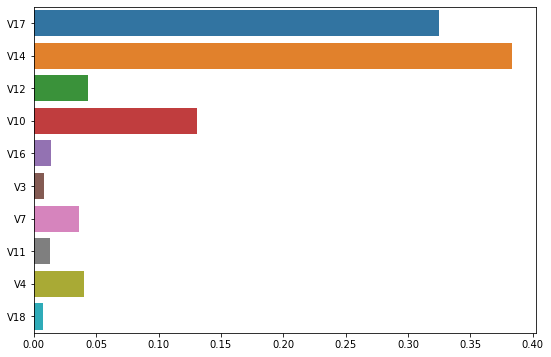

In [136]:
plt.figure(figsize=(9, 6))
sns.barplot(RF.feature_importances_, X.columns)
plt.show()

### eXtra Gradient Boost Classifier

In [137]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(booster='gbtree',
                    n_estimators=100,
                    learning_rate=0.01,
                    reg_lambda=0.05,
                    n_jobs=-1)

XGB.fit(X_train, y_train)

CPU times: user 32.7 s, sys: 48.2 ms, total: 32.8 s
Wall time: 16.8 s


In [138]:
accuracy_score_XGB2 = accuracy_score(y_test, XGB.predict(X_test))
recall_score_XGB2 = recall_score(y_test, XGB.predict(X_test), pos_label=1)

print(accuracy_score_XGB2)
print(recall_score_XGB2)
print(confusion_matrix(y_test, XGB.predict(X_test)))

results_2.append(['eXtra Gradient Boost', recall_score_XGB2, accuracy_score_XGB2])

0.9994382219725431
0.8243243243243243
[[85273    22]
 [   26   122]]


In [139]:
XGB.feature_importances_

array([7.4812680e-01, 5.3194016e-02, 7.0947751e-02, 6.6592261e-02,
       0.0000000e+00, 0.0000000e+00, 3.5076510e-02, 1.0593648e-02,
       1.4728401e-02, 7.4069871e-04], dtype=float32)

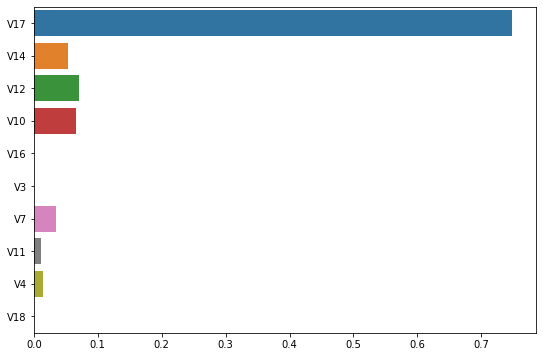

In [140]:
plt.figure(figsize=(9, 6))
sns.barplot(XGB.feature_importances_, X.columns)
plt.show()

### Decision Tree Classifier

In [141]:
%%time

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='entropy',
                            max_depth=7,
                            random_state=2045)

DT.fit(X_train, y_train)

CPU times: user 3.84 s, sys: 10.4 ms, total: 3.85 s
Wall time: 3.86 s


In [142]:
accuracy_score_DT2 = accuracy_score(y_test, DT.predict(X_test))
recall_score_DT2 = recall_score(y_test, DT.predict(X_test), pos_label=1)

print(accuracy_score_DT2)
print(recall_score_DT2)
print(confusion_matrix(y_test, DT.predict(X_test)))

results_2.append(['Decision Tree', recall_score_DT2, accuracy_score_DT2])

0.9994616293903538
0.831081081081081
[[85274    21]
 [   25   123]]


In [143]:
DT.feature_importances_

array([0.10320276, 0.67449402, 0.01900145, 0.10993244, 0.01798526,
       0.00505848, 0.02064588, 0.00243536, 0.04724436, 0.        ])

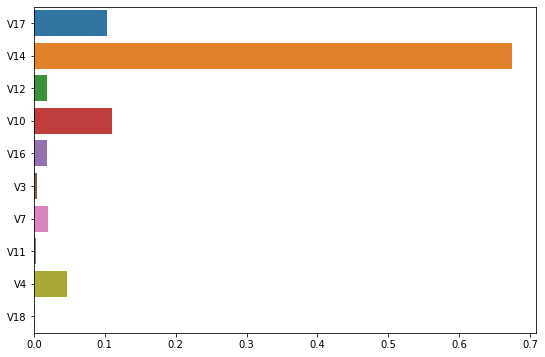

In [144]:
plt.figure(figsize=(9, 6))
sns.barplot(DT.feature_importances_, X.columns)
plt.show()

### Result

In [184]:
results_2.sort(key=lambda x: -x[1])
print(f'\t\t --Recall Score--\n')
for i in range(len(results_2)):
  print(f'{results_2[i][0]:>25} : {results[i][1]:.5f} -> {results_2[i][1]:.5f}')

results_2.sort(key=lambda x: -x[2])
print(f'\n\t\t --Accuracy Score--\n')
for i in range(len(results_2)):
  print(f'{results_2[i][0]:>25} : {results_2[i][2]:.5f}')

		 --Recall Score--

            Random Forest : 0.81757 -> 0.86486
            Decision Tree : 0.79054 -> 0.83108
     eXtra Gradient Boost : 0.81081 -> 0.82432

		 --Accuracy Score--

            Random Forest : 0.99965
            Decision Tree : 0.99946
     eXtra Gradient Boost : 0.99944


## Random Forest 수정

In [178]:
result_RF = []

In [179]:
result_RF.append(results[0])
result_RF.append(results_2[0])

In [180]:
result_RF

[['Random Forest', 0.8175675675675675, 0.9995318516437859],
 ['Random Forest', 0.8648648648648649, 0.9996488887328394]]

### max_depth = 7 => 10

In [158]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy',
                            n_estimators=100,
                            max_features=7,
                            max_depth=10,
                            random_state=2045,
                            n_jobs=-1)

RF.fit(X_train, y_train)

CPU times: user 4min 52s, sys: 197 ms, total: 4min 53s
Wall time: 2min 29s


In [181]:
accuracy_score_RF3 = accuracy_score(y_test, RF.predict(X_test))
recall_score_RF3 = recall_score(y_test, RF.predict(X_test), pos_label=1)

print(accuracy_score_RF3)
print(recall_score_RF3)
print(confusion_matrix(y_test, RF.predict(X_test)))

result_RF.append(['Random Forest max_depth=10', recall_score_RF3, accuracy_score_RF3])

0.999602073897218
0.8581081081081081
[[85282    13]
 [   21   127]]


### max_features = 7 => 5, n_estimators = 100 => 300

In [175]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy',
                            n_estimators=300,
                            max_features=5,
                            max_depth=7,
                            random_state=2045,
                            n_jobs=-1)

RF.fit(X_train, y_train)

CPU times: user 9min 37s, sys: 449 ms, total: 9min 37s
Wall time: 4min 53s


In [182]:
accuracy_score_RF3 = accuracy_score(y_test, RF.predict(X_test))
recall_score_RF3 = recall_score(y_test, RF.predict(X_test), pos_label=1)

print(accuracy_score_RF3)
print(recall_score_RF3)
print(confusion_matrix(y_test, RF.predict(X_test)))

result_RF.append(['Random Forest n_est=300', recall_score_RF3, accuracy_score_RF3])

0.999602073897218
0.8581081081081081
[[85282    13]
 [   21   127]]


### max_depth = 7 => 20

In [185]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy',
                            n_estimators=100,
                            max_features=7,
                            max_depth=20,
                            random_state=2045,
                            n_jobs=-1)

RF.fit(X_train, y_train)

CPU times: user 4min 56s, sys: 244 ms, total: 4min 56s
Wall time: 2min 31s


In [186]:
accuracy_score_RF3 = accuracy_score(y_test, RF.predict(X_test))
recall_score_RF3 = recall_score(y_test, RF.predict(X_test), pos_label=1)

print(accuracy_score_RF3)
print(recall_score_RF3)
print(confusion_matrix(y_test, RF.predict(X_test)))

result_RF.append(['Random Forest max_depth=20', recall_score_RF3, accuracy_score_RF3])

0.9996254813150287
0.8581081081081081
[[85284    11]
 [   21   127]]


### x 5개로 줄이기

In [200]:
X = DF[['V17', 'V14', 'V12', 'V10', 'V16']]
y = DF.iloc[:,-1]

X.shape, y.shape

((284807, 5), (284807,))

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 5), (199364,), (85443, 5), (85443,))

In [203]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy',
                            n_estimators=100,
                            max_features=5,
                            max_depth=7,
                            random_state=2045,
                            n_jobs=-1)

RF.fit(X_train, y_train)

CPU times: user 3min 13s, sys: 154 ms, total: 3min 13s
Wall time: 1min 38s


In [204]:
accuracy_score_RF4 = accuracy_score(y_test, RF.predict(X_test))
recall_score_RF4 = recall_score(y_test, RF.predict(X_test), pos_label=1)

print(accuracy_score_RF4)
print(recall_score_RF4)
print(confusion_matrix(y_test, RF.predict(X_test)))

result_RF.append(['Random Forest', recall_score_RF4, accuracy_score_RF4])

0.9995435553526912
0.8581081081081081
[[85277    18]
 [   21   127]]


### Result

In [205]:
print(f'\t\t --Recall Score--\n')
for i in range(len(result_RF)):
  print(f'{result_RF[i][0]:>30} : {result_RF[i][1]:.5f}')

		 --Recall Score--

                 Random Forest : 0.81757
                 Random Forest : 0.86486
    Random Forest max_depth=10 : 0.85811
       Random Forest n_est=300 : 0.85811
    Random Forest max_depth=20 : 0.85811
                 Random Forest : 0.85811


## XGB 수정

In [191]:
result_XGB = []

In [192]:
result_XGB.append(results[2])
result_XGB.append(results_2[2])

In [193]:
result_XGB

[['eXtra Gradient Boost', 0.8108108108108109, 0.9993679997191109],
 ['eXtra Gradient Boost', 0.8243243243243243, 0.9994382219725431]]

### reg_lambda=0.1

In [198]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(booster='gbtree',
                    n_estimators=100,
                    learning_rate=0.01,
                    reg_lambda=0.5,
                    n_jobs=-1)

XGB.fit(X_train, y_train)

CPU times: user 31.7 s, sys: 34.8 ms, total: 31.7 s
Wall time: 16.2 s


In [199]:
accuracy_score_XGB3 = accuracy_score(y_test, XGB.predict(X_test))
recall_score_XGB3 = recall_score(y_test, XGB.predict(X_test), pos_label=1)

print(accuracy_score_XGB3)
print(recall_score_XGB3)
print(confusion_matrix(y_test, XGB.predict(X_test)))

result_XGB.append(['eXtra Gradient Boost reg=0.5', recall_score_XGB3, accuracy_score_XGB3])

0.9994382219725431
0.8243243243243243
[[85273    22]
 [   26   122]]
